In [1]:
import pandas as pd
from transformers import pipeline

# Leer dataset desde CSV
df = pd.read_csv("../data/comentarios.csv")

# Cargar pipeline de análisis de sentimientos (multilingüe, soporta español)
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="nlptown/bert-base-multilingual-uncased-sentiment"
)

C:\Users\aml\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\aml\AppData\Local\Programs\Python\Python313\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\aml\.cache\huggingface\hub\models--nlptown--bert-base-multilingual-uncased-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or t

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Device set to use cpu


In [5]:
!py -m spacy download es_core_news_sm

     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     --------------------------------------  12.8/12.9 MB 77.3 MB/s eta 0:00:01
     --------------------------------------- 12.9/12.9 MB 41.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\aml\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [6]:
import spacy
nlp = spacy.load("es_core_news_sm")
print("spaCy cargado: usando lematización y stopwords de spaCy.")

def preprocess_spacy(text):
    doc = nlp(str(text).lower())
    tokens = [t.lemma_ for t in doc if not t.is_stop and t.is_alpha]
    return " ".join(tokens)

df["texto_preprocesado"] = df["texto_comentario"].apply(preprocess_spacy)

spaCy cargado: usando lematización y stopwords de spaCy.


In [7]:
# Analizar sentimientos
results = df["texto_preprocesado"].apply(lambda x: sentiment_pipeline(x)[0])

# Guardar resultados en nuevas columnas
df["sentimiento"] = results.apply(lambda r: r["label"])
df["score"] = results.apply(lambda r: r["score"])

# Mostrar tabla final
print(df[["id_comentario", "calificacion", "sentimiento", "score"]])

# (Opcional) exportar a CSV con resultados
df.to_csv("comentarios_con_sentimiento.csv", index=False)

     id_comentario  calificacion sentimiento     score
0                1             5     5 stars  0.636286
1                2             4     4 stars  0.343702
2                3             5     4 stars  0.269417
3                4             3     3 stars  0.433529
4                5             4     4 stars  0.427259
..             ...           ...         ...       ...
615            616             5     5 stars  0.814916
616            617             5     5 stars  0.897432
617            618             4     5 stars  0.490447
618            619             4     4 stars  0.454922
619            620             5     5 stars  0.726332

[620 rows x 4 columns]


C:\Users\aml\AppData\Local\Temp\ipykernel_27292\129840792.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="sentimiento_simple", palette="Set2")


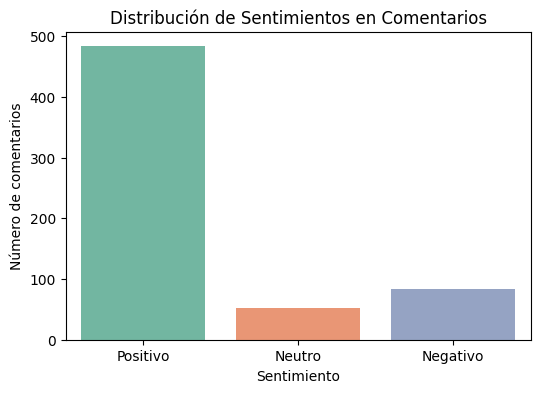

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Normalizar etiquetas (opcional: agrupar positivo / neutro / negativo)
def normalize_label(label):
    estrellas = int(label.split()[0])  # "5 stars" → 5
    if estrellas <= 2:
        return "Negativo"
    elif estrellas == 3:
        return "Neutro"
    else:
        return "Positivo"

df["sentimiento_simple"] = df["sentimiento"].apply(normalize_label)

# --- Visualización ---
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="sentimiento_simple", palette="Set2")
plt.title("Distribución de Sentimientos en Comentarios")
plt.xlabel("Sentimiento")
plt.ylabel("Número de comentarios")
plt.show()